In [1]:
import pandas as pd
df = pd.read_excel ('2015-2019 performers.xlsx')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#df.loc[df['year'] == 2019].sort_values(by=['jury']).tail(10)

In [3]:
def diffPlacement(year):
    data = df.loc[df['year']==year]
    final_placements = dict()
    final = []
    jury = []
    televoting = []

    for i, j in data.iterrows():
        #print(j[1])
        final_placements[j[1]] = j[14]
        jury.append((j[16], j[1]))
        televoting.append((j[15], j[1]))
        final.append((j[17], j[1]))

    jury = sorted(jury)[::-1]
    televoting = sorted(televoting)[::-1]

    jury_placements = dict()
    televoting_placements = dict()
    mesto = 1
    for poeni, zemja in jury:
        jury_placements[zemja] = mesto
        mesto+=1
    mesto = 1    
    for poeni, zemja in televoting:
        televoting_placements[zemja] = mesto
        mesto+=1
    
    razlika_ziri = 0
    razlika_ziri_site = 0
    razlika_tele = 0
    razlika_tele_site = 0
    razlika_tele_ziri_10 = 0
    razlika_tele_ziri_site = 0
    for zemja, mesto in final_placements.items():
        if mesto < 11:
            razlika_ziri = razlika_ziri + abs(mesto - jury_placements[zemja])
            razlika_tele = razlika_tele + abs(mesto - televoting_placements[zemja])
            razlika_tele_ziri_10 = razlika_tele_ziri_10 + (abs(jury_placements[zemja] - televoting_placements[zemja]))
        razlika_ziri_site = razlika_ziri_site + abs(mesto - jury_placements[zemja])
        razlika_tele_site = razlika_tele_site + abs(mesto - televoting_placements[zemja]) 
        razlika_tele_ziri_site = razlika_tele_ziri_site + abs(jury_placements[zemja] - televoting_placements[zemja])
    print("Difference in placements, top 10 - televoting: %.3f" % (razlika_tele/10))  
    print("Difference in placements, top 10  - jury: %.3f" % (razlika_ziri/10))
    print("Difference in placements, all placements - televoting: %.3f" % (razlika_tele_site/len(televoting)))  
    print("Difference in placements, all placements - jury: %.3f" % (razlika_ziri_site/len(televoting)))  
    print("Difference between jury and televoting placements, top 10: %.3f" % (razlika_tele_ziri_10/10))
    print("Difference between jury and televoting placements, all countries: %.3f" % (razlika_tele_ziri_site/len(televoting)))
          
          
    
diffPlacement(2019)    

Difference in placements, top 10 - televoting: 2.400
Difference in placements, top 10  - jury: 4.600
Difference in placements, all placements - televoting: 3.615
Difference in placements, all placements - jury: 3.231
Difference between jury and televoting placements, top 10: 5.800
Difference between jury and televoting placements, all countries: 6.231


In [4]:
diffPlacement(2018)

Difference in placements, top 10 - televoting: 3.900
Difference in placements, top 10  - jury: 4.700
Difference in placements, all placements - televoting: 3.692
Difference in placements, all placements - jury: 3.846
Difference between jury and televoting placements, top 10: 8.600
Difference between jury and televoting placements, all countries: 7.154


In [5]:
diffPlacement(2017)

Difference in placements, top 10 - televoting: 2.700
Difference in placements, top 10  - jury: 3.800
Difference in placements, all placements - televoting: 3.692
Difference in placements, all placements - jury: 3.385
Difference between jury and televoting placements, top 10: 6.500
Difference between jury and televoting placements, all countries: 6.692


In [6]:
diffPlacement(2016)

Difference in placements, top 10 - televoting: 2.200
Difference in placements, top 10  - jury: 4.200
Difference in placements, all placements - televoting: 3.231
Difference in placements, all placements - jury: 4.077
Difference between jury and televoting placements, top 10: 5.600
Difference between jury and televoting placements, all countries: 6.769


Standard deviation of jury points: 81.845
Standard deviation of televoting points: 90.112
Standard deviation of final points: 146.076


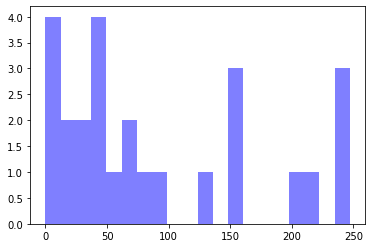

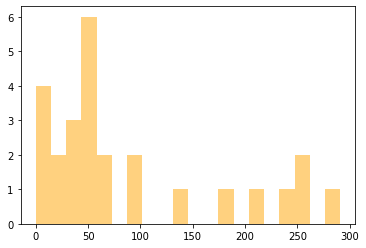

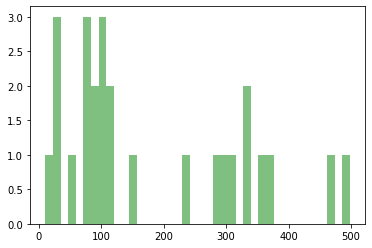

In [7]:
def stdev(nums):
    diffs = 0
    avg = 0
    stdv = 0
    
    if(nums):
        avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    if(len(nums)>1):
        stdv = (diffs/(len(nums)-1))**(0.5)    
    return stdv

def pointDistribution(year):
    data = df.loc[df['year']==year]
    final = []
    jury = []
    televoting = []

    for i, j in data.iterrows():
        jury.append(j[16])
        televoting.append(j[15])
        final.append(j[17])
        
    print("Standard deviation of jury points: %.3f" % stdev(jury))
    print("Standard deviation of televoting points: %.3f" % stdev(televoting))
    print("Standard deviation of final points: %.3f" % stdev(final))
    
    plt.hist(jury, 20, facecolor='blue', alpha=0.5)
    plt.show()
    plt.hist(televoting, 20, facecolor='orange', alpha=0.5)
    plt.show()
    plt.hist(final, 40, facecolor='green', alpha=0.5)
    plt.show()
pointDistribution(2019)

Standard deviation of jury points: 73.832
Standard deviation of televoting points: 83.492
Standard deviation of final points: 124.757


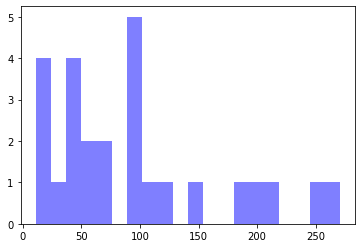

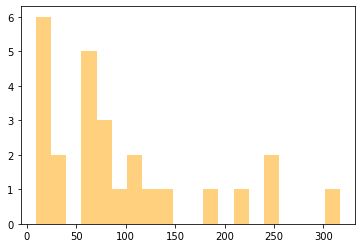

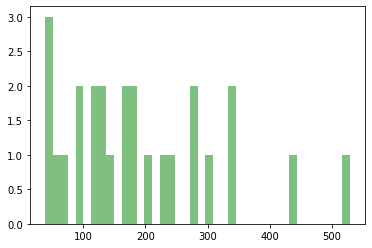

In [8]:
pointDistribution(2018)

Standard deviation of jury points: 88.354
Standard deviation of televoting points: 113.369
Standard deviation of final points: 183.834


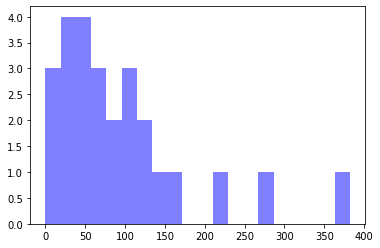

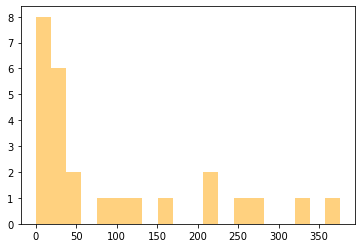

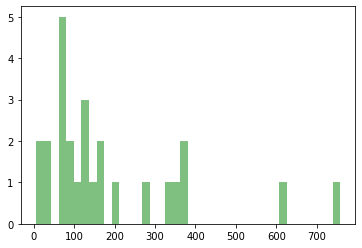

In [9]:
pointDistribution(2017)

Standard deviation of jury points: 67.279
Standard deviation of televoting points: 95.533
Standard deviation of final points: 139.249


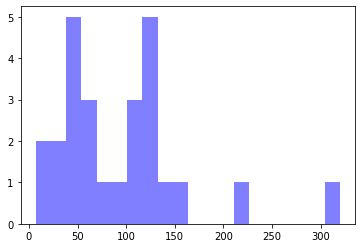

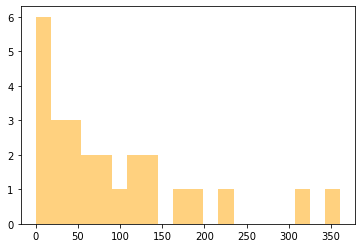

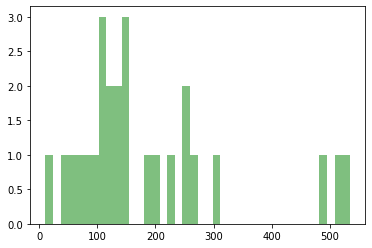

In [10]:
pointDistribution(2016)